<a href="https://colab.research.google.com/github/jkm243/TSOS/blob/master/TSOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import matplotlib.pyplot as plt


In [ ]:
# Размер изоброжение
largeur_image = 50
hauteur_image = 50


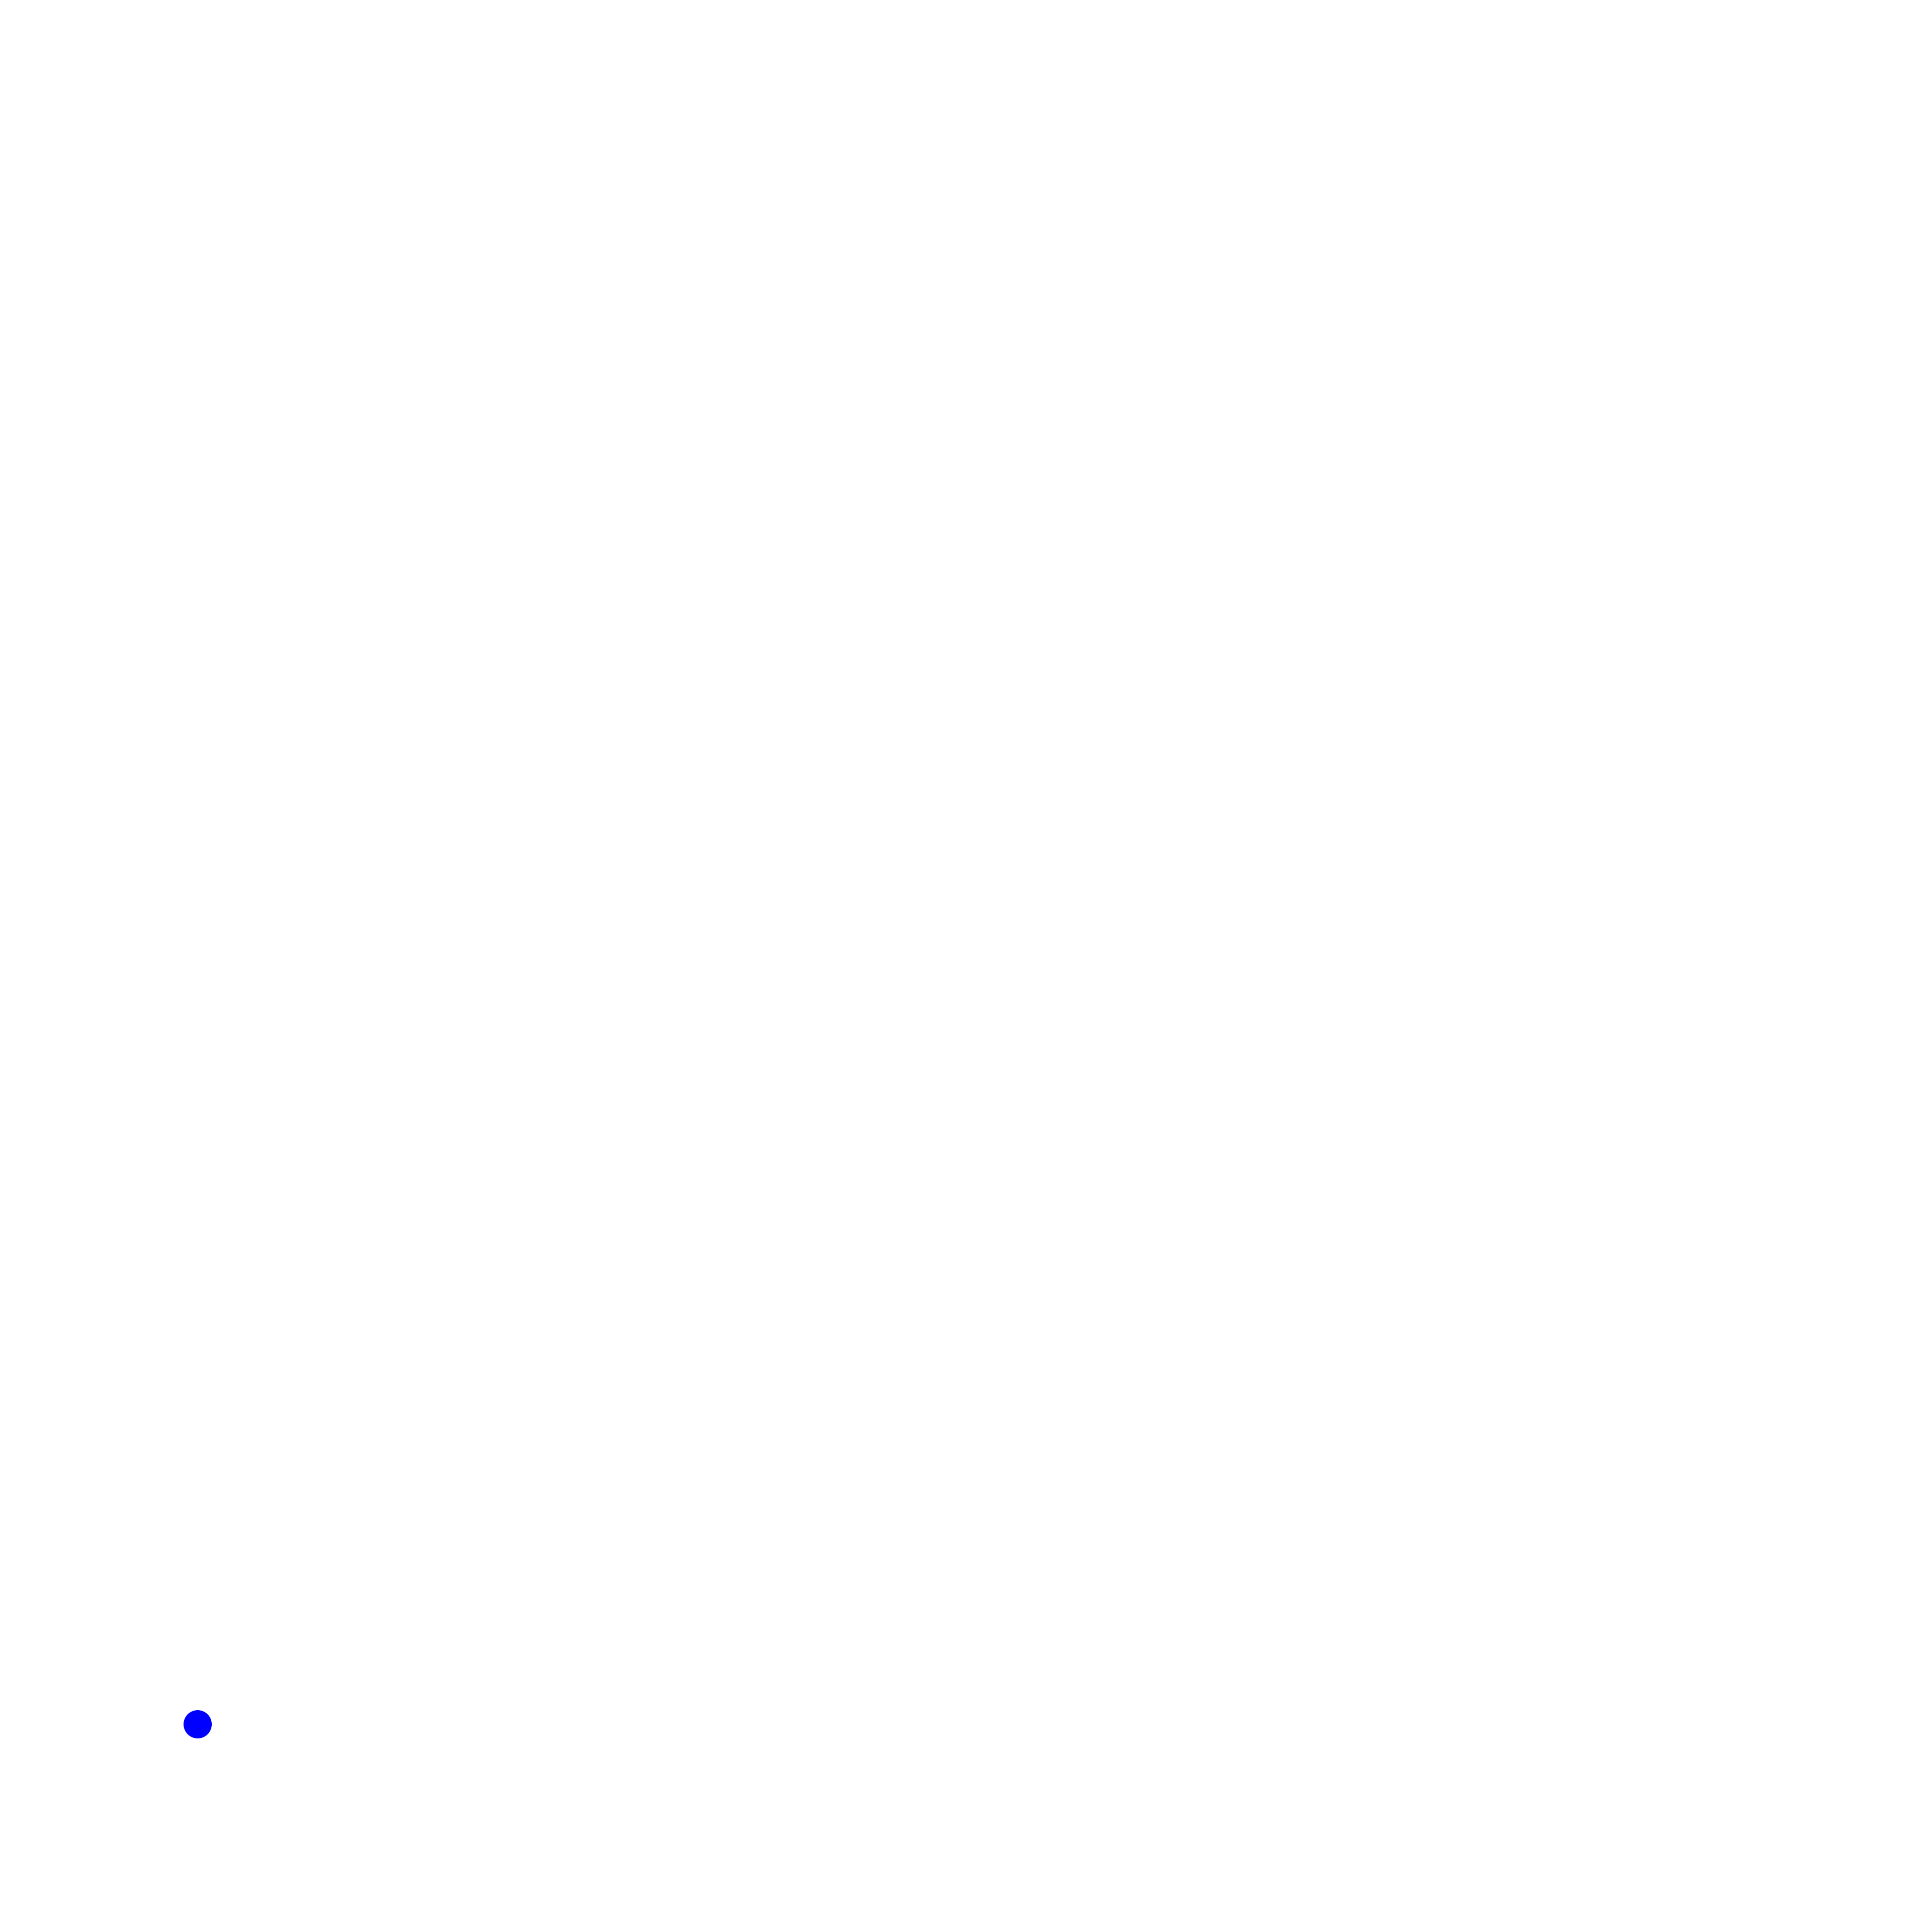

In [ ]:
# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(largeur_image, hauteur_image))

# Установить пределы оси
ax.set_xlim(0, largeur_image)
ax.set_ylim(0, hauteur_image)

# Placer un point aux coordonnées (x, y)
x = 5
y = 5
ax.plot(x, y, 'bo', markersize=40)
ax.axis('off')

# save image
plt.savefig("figure_image1.jpg", bbox_inches='tight', pad_inches=0)



## **1. Génération des images et des annotations**

Nous allons commencer par générer les images avec des points aléatoires et enregistrer les coordonnées comme précédemment.


In [ ]:
import matplotlib.pyplot as plt
import random
import os

# Créer un dossier pour enregistrer les images
os.makedirs("dataset_images", exist_ok=True)

# Fichier pour enregistrer les annotations
with open("annotations.txt", "w") as annotation_file:
    coord_set = set()

    # Générer 1000 images
    for i in range(1000):
        while True:
            x = random.randint(0, 499)  # Coordonnée x entre 0 et 499
            y = random.randint(0, 499)  # Coordonnée y entre 0 et 499
            if (x, y) not in coord_set:  # Vérifier si les coordonnées sont uniques
                coord_set.add((x, y))
                break

        # Créer une figure avec des dimensions de 5x5 pouces
        fig = plt.figure(figsize=(5, 5))  # Dimensions de l'image en pouces

        # Placer le point aux coordonnées (x, y) normalisées pour [0,1]
        plt.plot(x / 500, y / 500, 'bo', markersize=20)  # Normaliser x et y

        # Définir les limites de l'axe
        plt.xlim(0, 1)  # Limites de l'axe X
        plt.ylim(0, 1)  # Limites de l'axe Y

        # Désactiver les axes
        plt.axis('off')

        # Enregistrer l'image avec le point dessiné
        filename = f"dataset_images/image_{i + 1}.png"
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

        # Écrire les coordonnées dans le fichier d'annotations
        annotation_file.write(f"{filename}: ({x}, {y})\n")

        # Fermer la figure pour éviter d'afficher quoi que ce soit
        plt.close(fig)

print("Images et annotations créées avec succès.")


Images et annotations créées avec succès.


In [19]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# **2. Préparation des données**

Nous allons charger les images et les annotations pour préparer les données pour l'entraînement.

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_data(image_folder='dataset_images', annotation_file='annotations.txt'):
    images = []
    labels = []

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.split(':')
            image_path = parts[0].strip()
            coords = parts[1].strip().split('(')[1].split(')')[0].split(',')
            x = float(coords[0]) / 500  # Normaliser x
            y = float(coords[1]) / 500  # Normaliser y

            img = load_img(image_path, target_size=(224, 224))  # Redimensionner à 224x224
            img_array = img_to_array(img) / 255.0  # Normaliser les pixels

            images.append(img_array)
            labels.append([x, y])  # Ajouter les coordonnées normalisées

    return np.array(images), np.array(labels)

images, labels = load_data()
print(f"Loaded {len(images)} images and corresponding labels.")


Loaded 1000 images and corresponding labels.


# **3. Création du modèle**

Nous allons créer un modèle de réseau de neurones convolutif (CNN).

In [21]:
from tensorflow.keras import layers, models

# Créer le modèle CNN avec une architecture améliorée
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)  # Sortie pour les coordonnées x et y
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')


# **4. Entraînement du modèle**

Nous allons entraîner le modèle sur les données préparées.
python

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 278s 11s/step - loss: 22.4533 - mae: 2.0517 - val_loss: 0.0880 - val_mae: 0.2554
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - loss: 0.0787 - mae: 0.2342 - val_loss: 0.0292 - val_mae: 0.1354
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 276s 11s/step - loss: 0.0196 - mae: 0.0987 - val_loss: 0.0115 - val_mae: 0.0736
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - loss: 0.0090 - mae: 0.0614 - val_loss: 0.0083 - val_mae: 0.0631
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 271s 11s/step - loss: 0.0052 - mae: 0.0500 - val_loss: 0.0054 - val_mae: 0.0488
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 11s/step - loss: 0.0036 - mae: 0.0427 - val_loss: 0.0048 - val_mae: 0.0467
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 271s 11s/step - loss: 0.0024 - mae: 0.0337 - val_loss: 0.0031 - val_mae: 0.0382
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 322s 11s/step - loss: 0.0018 - mae: 0.0295 - val_loss: 0.0033 - val_mae: 0.0416
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 323s 11s/step - l

Model trained and saved successfully.
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - loss: 0.0020 - mae: 0.0332
Loss: 0.0023, Mean Absolute Error: 0.0348 (3.48%)


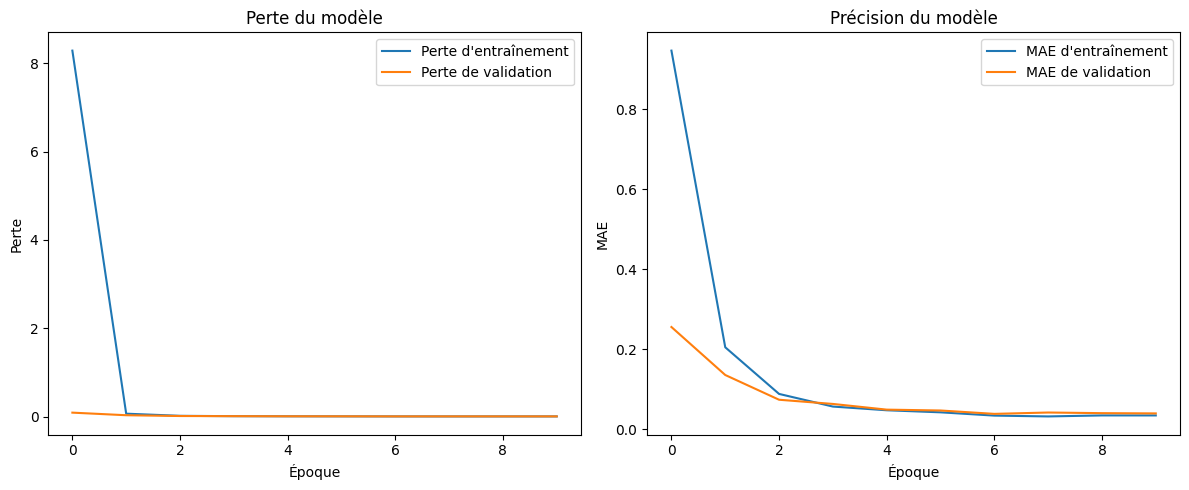

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Créer le modèle CNN avec une architecture améliorée
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)  # Sortie pour les coordonnées x et y
])

# Compiler le modèle avec la métrique de précision
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Utilisation de MAE comme métrique

# Ajouter un callback pour arrêter l'entraînement si la validation ne s'améliore pas
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Entraîner le modèle avec validation et stocker l'historique
history = model.fit(images, labels, epochs=10, validation_split=0.2, callbacks=[early_stopping])
model.save('model.h5')
print("Model trained and saved successfully.")

# Évaluer le modèle sur les données d'entraînement pour obtenir l'accuracy
loss, mae = model.evaluate(images, labels)
mae_percentage = mae * 100  # Convertir MAE en pourcentage

print(f"Loss: {loss:.4f}, Mean Absolute Error: {mae:.4f} ({mae_percentage:.2f}%)")

# Affichage des graphiques de perte et de précision
plt.figure(figsize=(12, 5))

# Graphique de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

# Graphique de la précision (MAE dans ce cas)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE d\'entraînement')  # MAE comme mesure de performance
plt.plot(history.history['val_mae'], label='MAE de validation')  # MAE pour la validation
plt.title('Précision du modèle')
plt.xlabel('Époque')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


# **5. Tester le modèle**

Pour tester le modèle sur une nouvelle image :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


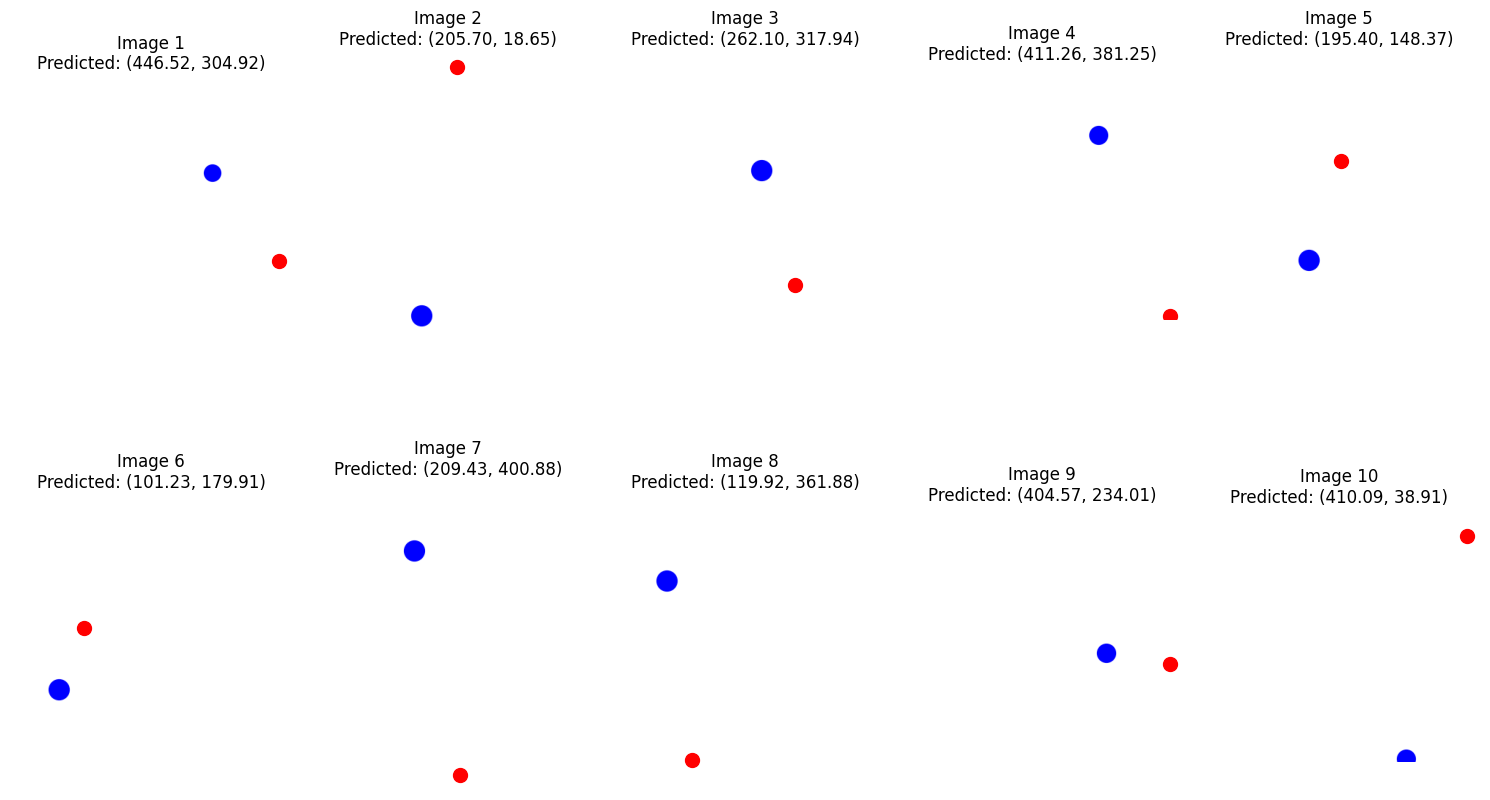

In [26]:
def predict_point(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0   # Normaliser les pixels
    img_array = np.expand_dims(img_array, axis=0)   # Ajouter une dimension pour le batch

    prediction = model.predict(img_array)
    return prediction[0] * 500   # Dé-normaliser les coordonnées

# Test sur plusieurs images
image_folder = 'dataset_images'
image_files = [f"{image_folder}/image_{i}.png" for i in range(441, 451)]

plt.figure(figsize=(15, 10))

for i, image_to_test in enumerate(image_files):
    predicted_coords = predict_point(image_to_test)

    original_image = load_img(image_to_test)

    plt.subplot(2, 5, i + 1)
    plt.imshow(original_image)
    plt.title(f"Image {i + 1}\nPredicted: ({predicted_coords[0]:.2f}, {predicted_coords[1]:.2f})")
    plt.scatter(predicted_coords[0], predicted_coords[1], color='red', s=100)
    plt.axis('off')

plt.tight_layout()
plt.show()
